In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df = pd.read_csv("/content/immo_data.csv", encoding='ISO-8859-1') # Update path as needed
print(df.shape)
df.head()

(268850, 49)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,SchÃ¼ren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,43586
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,BÃ¶hl_Iggelheim,Alles neu macht der Mai â so kann es auch fÃ...,NaN,NaN,NaN,2019.0,NaN,NaN,43586
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,ÃuÃere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,* 9 mÂ² Balkon\n* Bad mit bodengleicher Dusche...,NaN,NaN,NaN,NaN,NaN,43739
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von LÃ¤rm und Abgasen in Ihre neue Woh...,NaN,87.23,NaN,NaN,NaN,NaN,43586
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,43862


In [17]:
# Check dataset shape, types, and missing values
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (268850, 49)

Column Types:
 regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street              

In [18]:
# Step 1: Define target
target_col = 'totalRent'

#  Step 2: Drop irrelevant or high-missing-value columns
columns_to_drop = [
    'scoutId', 'description', 'facilities', 'houseNumber', 'street', 'streetPlain',
    'telekomHybridUploadSpeed', 'telekomUploadSpeed', 'telekomTvOffer',
    'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice',
    'noParkSpaces', 'heatingCosts', 'petsAllowed', 'interiorQual', 'firingTypes'
]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Step 3: Drop rows with missing target
df_cleaned = df_cleaned.dropna(subset=[target_col])

# Step 4: Fill missing numerical values with median
num_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Step 5: One-hot encode categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)

# Final check
print(df_encoded.shape)
df_encoded.head()

(228333, 9261)


,serviceCharge,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,...,regio3_Ãberlingen,regio3_Ãberruhr_Hinsel,regio3_Ãberruhr_Holthausen,regio3_Ãbersee,regio3_Ãberwasser,regio3_Ãckendorf,regio3_Ãckeritz,regio3_Ãckesdorf,regio3_Ãhlingen_Birkendorf,regio3_Ãrzig
0,245.0,False,False,6,4.62,840.00,1965.0,False,True,2.0,...,False,False,False,False,False,False,False,False,False,False
2,255.0,True,True,8,2.72,1300.00,2019.0,False,True,9.0,...,False,False,False,False,False,False,False,False,False,False
4,138.0,False,True,19,2.46,903.00,1950.0,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
6,70.0,False,False,9,1.01,380.00,1972.0,False,True,3.0,...,False,False,False,False,False,False,False,False,False,False
7,88.0,False,True,5,1.89,584.25,1959.0,False,True,2.0,...,False,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.model_selection import train_test_split

df_sampled = df_encoded.sample(n=10000, random_state=42)

X = df_sampled.drop(columns=['totalRent'])
y = df_sampled['totalRent']

# Then do the usual train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train and evaluate Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.4f}\n")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression:
  RMSE: 60.38
  R² Score: 0.9873

Random Forest Regressor:
  RMSE: 63.64
  R² Score: 0.9859



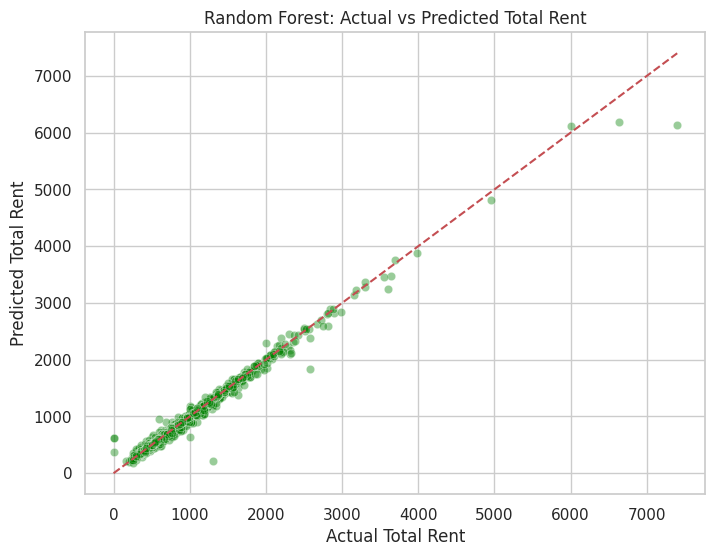

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot: True vs Predicted Rent (Random Forest)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4, color='green')
plt.xlabel("Actual Total Rent")
plt.ylabel("Predicted Total Rent")
plt.title("Random Forest: Actual vs Predicted Total Rent")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()